In [1]:
!pip -q install matplotlib
!pip -q install cv
!pip -q install opencv-python
!pip -q install jupyter notebook
!pip -q install progressbar
!pip -q install numpy
!pip -q install tensorflow
#!pip -q install gc
import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable


0

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import image processing libraries
import cv2
from keras.models import load_model
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os
from keras.models import Sequential
#from keras.models import predict_classes
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, BatchNormalization, Dropout
from keras import regularizers
#import additional libraries
import progressbar
device = "cpu"
print("Packages imported...")
train_dir = '/home/a.kocsis/Final Project/Dataset/asl_alphabet_train/'
model_save_dir = '/home/a.kocsis/Final Project/'

2022-04-19 15:50:13.133675: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/a.kocsis/.local/lib/python3.8/site-packages/cv2/../../lib64:/opt/slurm/lib64:/opt/slurm/lib64:
2022-04-19 15:50:13.133738: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Packages imported...


In [3]:
#reads, resizes, and converts images to RGB which are then appended to arrays images_for_plot and labels_for_plot (may take a while only for visualization)
def data_visualization():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)                         
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

labels =  ['Z', 'K', 'B', 'D', 'H', 'R', 'G', 'S', 'del', 'nothing', 'W', 'O', 'space', 'L', 'V', 'Y', 'T', 'I', 'Q', 'A', 'M', 'F', 'X', 'J', 'N', 'U', 'E', 'P', 'C']


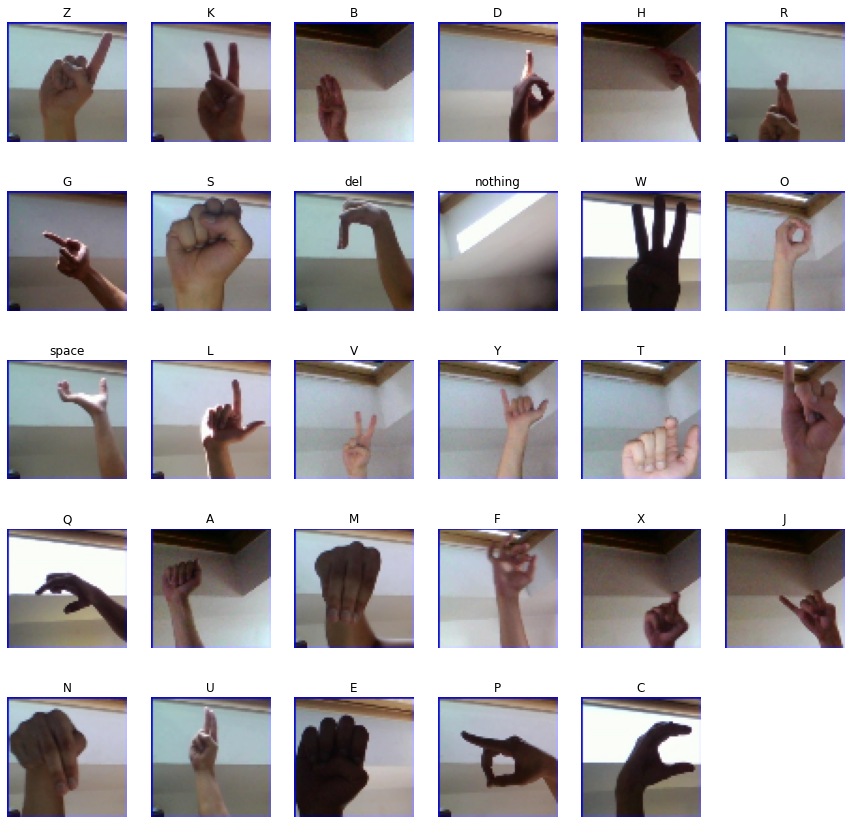

In [4]:
images_for_plot, labels_for_plot = data_visualization()
print("labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [5]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000 #change this back to 87000, only using subset for kernel testing

def get_data(folder):
    bar = progressbar.ProgressBar(maxval=train_len, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder): #converts the alphabetical labels to number labels
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, (imageSize, imageSize))
                    np_image = np.array(img_file)
                    np_image = np_image.astype('float32')/255.0
                    img_arr = np_image.reshape((-1, imageSize, imageSize, 3))
                    
                    if cnt < train_len:
                        X[cnt] = img_arr
                        y[cnt] = label
                        cnt += 1
                    else:
                        break
                        break
                        
                    if cnt < train_len:
                        bar.update(cnt)
                    
    return X,y

In [62]:
X_train, y_train = get_data(train_dir)

Images successfully imported...
The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)
The shape of one image is :  (64, 64, 3)


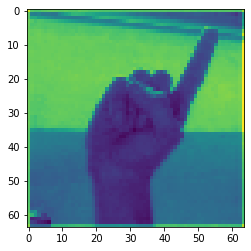

In [63]:
print("Images successfully imported...")

#sanity check
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("The shape of one image is : ", X_train[0].shape)
plt.imshow(X_train[0, :, :, 0])
plt.show()

In [64]:
#copies if cells above are changed
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [65]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [66]:
#onehot encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [67]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_cat_train.shape)

The shape of X_train is :  (60900, 64, 64, 3)
The shape of y_train is :  (60900, 29)


In [68]:
#so that the kernel does not crash
import gc
del X_data
del y_data
gc.collect()


3238

In [69]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(29, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [70]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [71]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 153s - loss: 1.3879 - accuracy: 0.5729 - val_loss: 0.2802 - val_accuracy: 0.9091 - 153s/epoch - 161ms/step
Epoch 2/50
952/952 - 151s - loss: 0.2248 - accuracy: 0.9225 - val_loss: 0.0701 - val_accuracy: 0.9800 - 151s/epoch - 159ms/step
Epoch 3/50
952/952 - 149s - loss: 0.1180 - accuracy: 0.9598 - val_loss: 0.0377 - val_accuracy: 0.9903 - 149s/epoch - 156ms/step
Epoch 4/50
952/952 - 151s - loss: 0.0838 - accuracy: 0.9715 - val_loss: 0.0227 - val_accuracy: 0.9937 - 151s/epoch - 159ms/step
Epoch 5/50
952/952 - 153s - loss: 0.0647 - accuracy: 0.9786 - val_loss: 0.0190 - val_accuracy: 0.9940 - 153s/epoch - 161ms/step
Epoch 6/50
952/952 - 153s - loss: 0.0606 - accuracy: 0.9800 - val_loss: 0.0286 - val_accuracy: 0.9909 - 153s/epoch - 160ms/step
Epoch 7/50
952/952 - 150s - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0074 - val_accuracy: 0.9977 - 150s/epoch - 158ms/step
Epoch 8/50
952/952 - 151s - loss: 0.0470 - accuracy: 0.9851 - val_loss: 0.0091 - val_accuracy: 0.9972 - 

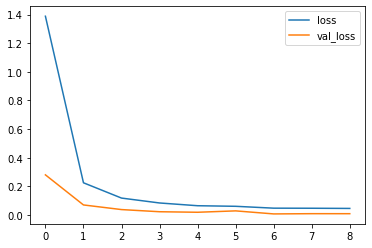

In [73]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
plt.show()


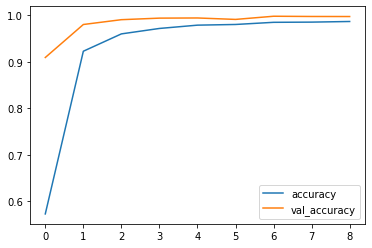

In [74]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [75]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.008984874002635479, 0.9971264600753784]

In [95]:
#model.save(model_save_dir)
#model.save("CNN_model_new_2.h5")

Assets written to: /home/a.kocsis/Final Project/assets


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

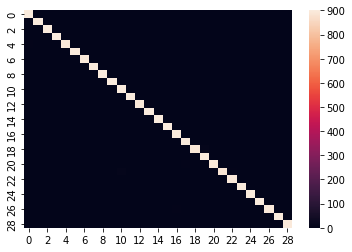

In [80]:
sns.heatmap(confusion_matrix(y_test, classes_x))
plt.show()

In [81]:
import cv2
 
#takes in file location and returns resized cv2 image
def resize_input_image(file_location):
    img = cv2.imread(file_location, cv2.IMREAD_UNCHANGED)
    dim = (64, 64)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    np_image = np.array(resized)
    #np_image = np_image.astype('float32')/255.0
    img_arr = np_image.reshape((-1, imageSize, imageSize, 3))
    return img_arr

In [82]:
test_img = resize_input_image('/home/a.kocsis/Final Project/adam_K.jpg')

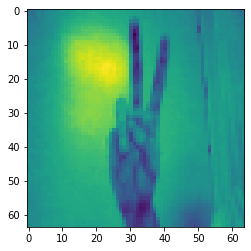

In [83]:
plt.imshow(test_img[0, :, :, 0])
plt.show()

In [96]:
model = keras.models.load_model("CNN_model_new_2.h5")
test_predict = model.predict(test_img)
test_val=np.argmax(test_predict, axis=1)

ValueError: in user code:

    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/a.kocsis/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 200, 3)


In [97]:
print(test_val)

[15]


In [98]:
#takes in an array of numbers and returns a sentence

def num_to_letter(numbers):
    sentence = ""
    letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", 'Y', 'Z', 'del', "nothing", "space"]
    for i in range(0, len(numbers)):
        if numbers[i] == "del":
            sentence = sentence.rstrip(sentence[-1])
        elif numbers[i] == "nothing":
            break
        elif numbers[i] == "space":
            sentence += " "
        else:
            sentence += letters[numbers[i]]
            
    return sentence

In [99]:
num_to_letter([0, 1, 2, 3])

'ABCD'

In [100]:
num_to_letter(classes_x[0:8])

'ZdelKUOYspaceG'

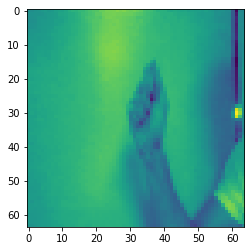

E


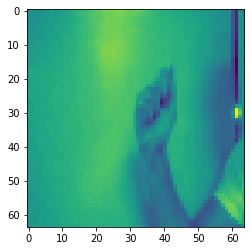

A


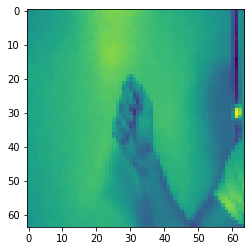

A


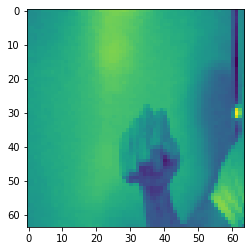

A


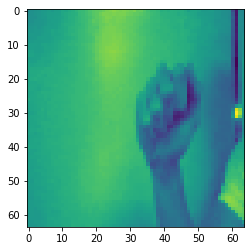

A


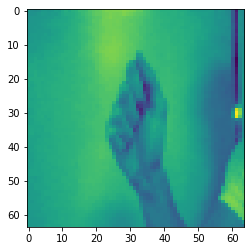

U


In [101]:
model = keras.models.load_model("CNN_model_new_2.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/A_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/A_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

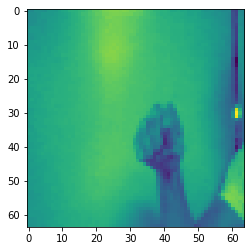

A


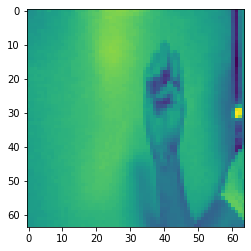

E


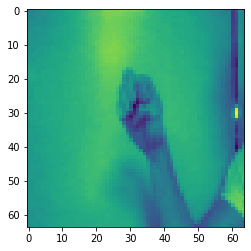

J


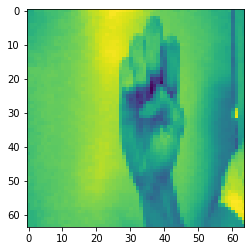

E


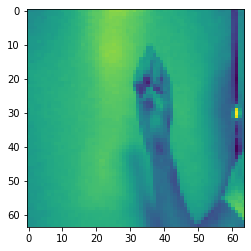

E


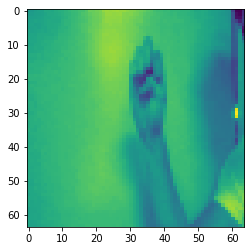

E


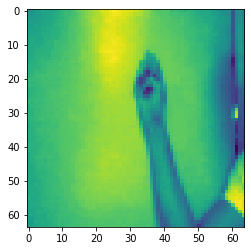

nothing


In [102]:
model = keras.models.load_model("CNN_model_new_2.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/E_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/E_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

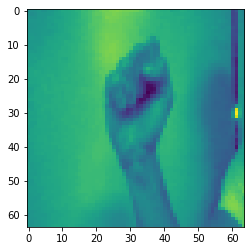

E


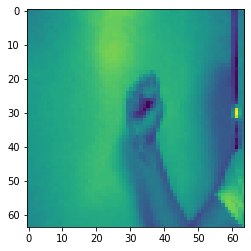

E


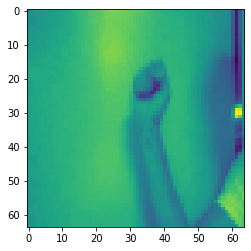

E


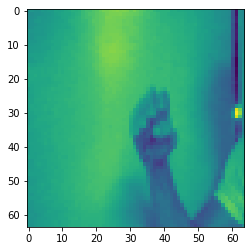

A


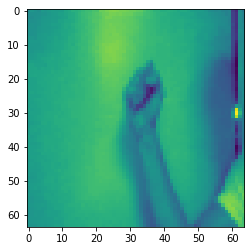

E


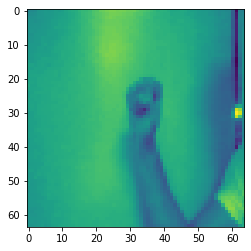

A


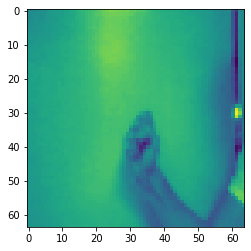

A


In [103]:
model = keras.models.load_model("CNN_model_new_2.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/S_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/S_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

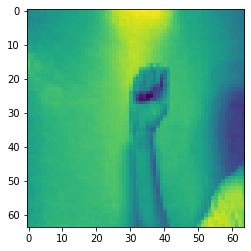

A


In [104]:
model = keras.models.load_model("CNN_model_new_2.h5")


test_img = resize_input_image('/home/a.kocsis/Final Project/adam_A.jpg')
plt.imshow(test_img[0, :, :, 0])
plt.show()
test_predict = model.predict(test_img)
test_val=np.argmax(test_predict, axis=1)
print(num_to_letter(test_val))

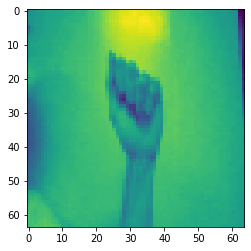

M


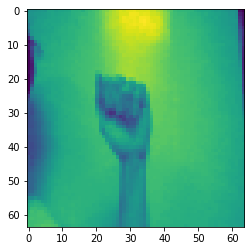

M


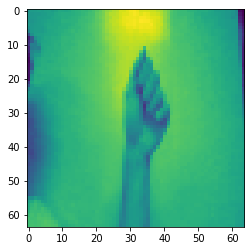

nothing


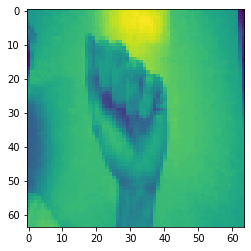

M


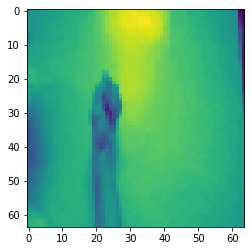

nothing


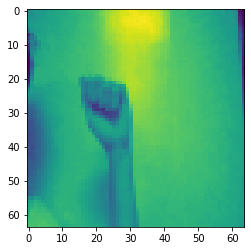

P


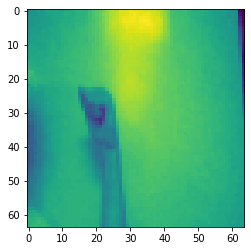

P


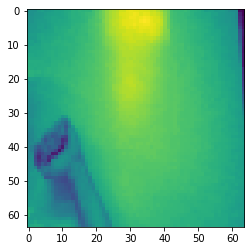

nothing


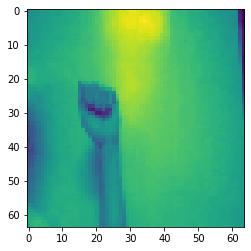

P


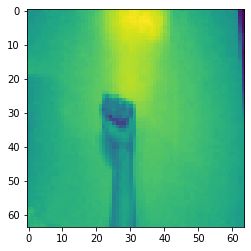

P


In [106]:
model = keras.models.load_model("CNN_model_new_2.h5")

for image_filename in os.listdir('/home/a.kocsis/Final Project/A_left_test'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/A_left_test' + '/' + image_filename)
    plt.imshow(test_img[0, :, :, 0])
    plt.show()
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))

In [107]:
model = keras.models.load_model("CNN_model_new_2.h5")
i = 0
miss = 0
for image_filename in os.listdir('/home/a.kocsis/Final Project/A'):
    test_img = cv2.imread('/home/a.kocsis/Final Project/A' + '/' + image_filename, cv2.IMREAD_UNCHANGED)
    test_img = resize_input_image(test_img)    

    test_predict = model.predict(img_arr)
    test_val=np.argmax(test_predict, axis=1)
    if num_to_letter(test_val) != 'A':
        miss += 1
    i+=1
print(miss/i)

TypeError: Can't convert object to 'str' for 'filename'

In [111]:
model = keras.models.load_model("CNN_model.h5")
i = 0
miss = 0
for image_filename in os.listdir('/home/a.kocsis/Final Project/A'):
    test_img = resize_input_image('/home/a.kocsis/Final Project/A' + '/' + image_filename)
    test_predict = model.predict(test_img)
    test_val=np.argmax(test_predict, axis=1)
    print(num_to_letter(test_val))
       

A
A
A
A
E
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
E
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
E
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
B
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A


KeyboardInterrupt: 

In [ ]:
  if (num_to_letter(test_val)) != 'A':
        miss+=1
        
    i+=1
    print(miss/i)